In [1]:
import pandas as pd
df=pd.read_csv('../dataset/covid_survey_data.csv')
print(df.shape)
df.drop(columns=['Unnamed: 0'],inplace=True)
df.head(5)

(249, 69)


,laundry detergent,Clove(lavang),Coriander seeds/Dhania,Garam/Goda masala,lemon,Milk,coffee,Sugar,Salt,Sour,...,Diarrhea,dry_mouth_com,Loss of appetite,difficult_breathing,no_chnage_in_taste,change_in_bitter,change_in_sweet,change_in_sour,change_in_salt,Diagnosed
0,75.0,72.0,66.000000,71.000000,77.0,70.0,71.0,69.0,63.0,93.000000,...,0,0,0,0,1,0,0,0,0,Non-COVID
1,53.0,89.0,100.000000,71.000000,50.0,77.0,84.0,70.0,95.0,100.000000,...,0,0,0,0,1,0,0,0,0,Non-COVID
2,80.0,100.0,100.000000,100.000000,99.0,100.0,100.0,83.0,74.0,66.000000,...,0,0,0,0,1,0,0,0,0,Non-COVID
3,76.0,87.0,59.955823,65.345382,55.0,50.0,30.0,69.0,56.0,71.710843,...,0,0,0,0,1,0,0,0,0,Non-COVID
4,75.0,88.0,96.000000,92.000000,68.0,27.0,79.0,69.0,85.0,89.000000,...,0,0,0,0,1,0,0,0,0,Non-COVID


In [8]:
cols=df.columns.tolist()
#cols=[]
df = df[cols]
#df.columns
smell=['laundry detergent', 'Clove(lavang)', 'Coriander seeds/Dhania',
       'Garam/Goda masala', 'lemon', 'Milk', 'coffee', 'smell_irritants_product']
taste=['Sugar', 'Salt', 'Sour','Bitter', 'chilly']
generic=['No_smoke',
       'Prefer_not_to_say_smoke', 'Yes_current_smoker', 'Yes_former smoker',
       'smell_complete_loss', 'moderate_smell_change', 'No_change_smell',
       'slight_change', 'contact_11_20', 'contact_21_50', 'contact_5_10',
       'contact_less_5', 'contact_greater_50', 'contacts_none', 'Female',
       'Seasonal allergies/hay fever', 'smell_disorder', 'taste_disorder',
       'no_comorbity', 'Diabetes (high blood sugar)', 'Obesity',
       'Chronic sinus problems', 'Other', 'High blood pressure', 'Head trauma',
       'Dry mouth', 'Heart disease (heart attack)',
       'Lung disease (asthma/COPD)', 'Neurological disease', 'Fever',
       'Changes in food flavor', 'Changes in smell', 'Changes in taste',
       'Headache', 'Fatigue', 'Body aches', 'Nausea', 'No symptoms',
       'Runny nose', 'Cough with mucus', 'Dry cough', 'Sore throat',
       'Skin sensitivity', 'Abdominal pain', 'Chest tightness', 'Diarrhea',
       'dry_mouth_com', 'Loss of appetite', 'difficult_breathing',
       'no_chnage_in_taste', 'change_in_bitter', 'change_in_sweet',
       'change_in_sour', 'change_in_salt']
label=['Diagnosed']

In [105]:
colnames=['Spices/Herbs-1','Spices/Herbs-2','Spices_Mix','Other_Smell_Products','Sweet','Salt','Sour','Chilly','Smell_Irritant_Products','Smell_Complete_Loss','Moderate_Smell_Change','No_Change_Smell','Slight_Change','Contact_11_20','Contact_21_50','Contact_5_10','Contact_less_5','Contact_greater_50','Contacts_None','No_Comorbity','Fever','Smell_Change','Taste_Change','Headache','No_symptoms','Runny_Nose','Cough_with_Mucus','Chest_Tightness','Difficult_Breathing','No_Chnage_in_Taste','Change_in_Bitter','Change_in_Sweet','Change_in_Sour','Change_in_Salt','Diagnosed']

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,make_scorer,precision_score,recall_score

def standarize(X_train,X_test):
    X_train_num=X_train[list(X_train.columns.values[0:9])]
    X_train_cat=X_train[list(X_train.columns.values[9:])]
    #labels=list(X_train['Diagnosed'])


    X_test_num=X_test[list(X_test.columns.values[0:9])]
    X_test_cat=X_test[list(X_test.columns.values[9:])]
    #labels=list(X_test['Diagnosed'])

    st_scale=StandardScaler().fit(X_train_num)
    X_train_num=pd.DataFrame(st_scale.transform(X_train_num), index=X_train_num.index, columns=X_train_num.columns)
    X_test_num=pd.DataFrame(st_scale.transform(X_test_num), index=X_test_num.index, columns=X_test_num.columns)

    X_train=pd.concat([X_train_num,X_train_cat],axis=1)
    X_test=pd.concat([X_test_num,X_test_cat],axis=1)
    return X_train,X_test

def pca_transformed(X_train,X_test):
    pca=PCA()
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)
    vrs=list(pca.explained_variance_ratio_)
    sum_vrs=0
    ind=len(vrs)-1
    for i in range(len(vrs)):
        sum_vrs+=vrs[i]
        if sum_vrs>=0.9:
            ind=i
            break
    X_train[:,0:ind+1]
    X_test[:,0:ind+1]
    return X_train,X_test


from pandas import read_csv
def evaluation_metrics(y_test, y_pred):
    """ 
    different performance measures (dict)
    """

    acc= accuracy_score(y_test,y_pred)
    pr=precision_score(y_test,y_pred,average='weighted')
    rc=recall_score(y_test,y_pred,average='weighted')
    f1 = f1_score(y_test,y_pred,average='weighted')
    auc =roc_auc_score(y_test,y_pred,average='weighted')
    metric=[acc,pr,rc,f1,auc]
    return metric

Automatically created module for IPython interactive environment
svc


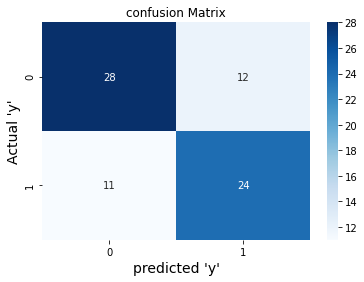

[SVC(C=1, class_weight='balanced', gamma=0.1, probability=True, random_state=0), 0.7299159663865546, 0.7454501638712164, 0.625, 0.6710738916256158, 0.7212719298245613]
[0.6933333333333334, 0.694017094017094, 0.6933333333333334, 0.6935520294764368, 0.6928571428571428]
gnb


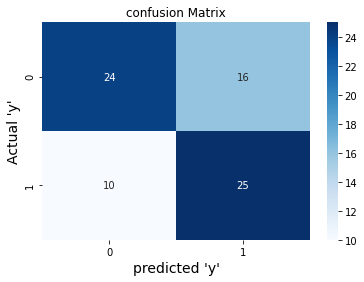

[GaussianNB(var_smoothing=5.336699231206302e-08), 0.7178151260504202, 0.7667032967032967, 0.6, 0.659132530508939, 0.7087719298245614]
[0.6533333333333333, 0.6610234337637494, 0.6533333333333333, 0.6529634898055949, 0.6571428571428573]
lr


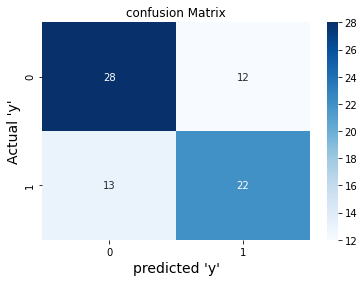

[LogisticRegression(C=1, class_weight='balanced', fit_intercept=False,
                   max_iter=500, random_state=0, solver='liblinear'), 0.7415126050420169, 0.7254988149105795, 0.7125, 0.7146400602240425, 0.7387061403508772]
[0.6666666666666666, 0.6661884265901483, 0.6666666666666666, 0.666308820898193, 0.6642857142857143]
dt


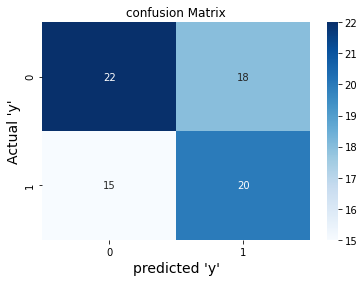

[DecisionTreeClassifier(class_weight='balanced', max_depth=5,
                       min_samples_split=5, random_state=0), 0.7929411764705883, 0.786470588235294, 0.775, 0.7680854629241727, 0.7904239766081871]
[0.56, 0.5627311522048365, 0.56, 0.5604696673189824, 0.5607142857142857]
rf


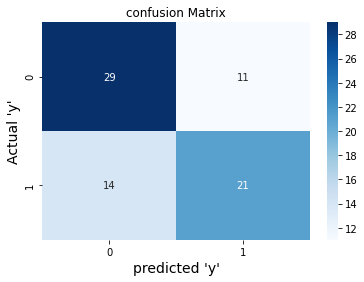

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, cross_validate, StratifiedKFold
from sklearn.metrics import roc_curve, auc
import numpy as np
np.random.seed(0)
import warnings
warnings.simplefilter('ignore')
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,make_scorer,precision_score,recall_score
print(__doc__)
cv_dict={}
test_dict={}

# Choose cross-validation techniques for the inner and outer loops,
# independently of the dataset.

# E.g "GroupKFold", "LeaveOneOut", "LeaveOneGroupOut", etc.

scoring={'Accuracy':make_scorer(accuracy_score),'Precision':make_scorer(precision_score),'Recall':make_scorer(recall_score),'F1 Score':make_scorer(f1_score),'AUC':make_scorer(roc_auc_score)}

inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

mts=['svc','gnb','lr','dt','rf']
# Set up possible values of parameters to optimize over
p_grids=[[] for i in range(5)]
p_grids[0] = {"C": [1, 10, 100, 1000, 10000],"gamma": [.0001, .001, .01, .1, .2, .5]}
p_grids[1]={'var_smoothing': np.logspace(0,-9, num=100)}
p_grids[2]={"C": [1, 10, 100, 1000, 10000],"fit_intercept":[True,False],"penalty":['l1', 'l2']}
p_grids[3]={'criterion':['gini','entropy'],'max_depth':  [1, 5, 10, 50], "min_samples_split": [5, 10, 100, 500]}
p_grids[4] = { 'n_estimators': [100,200],'max_features': ['auto', 'sqrt', 'log2'],'max_depth': [3, 5, 10],'min_samples_split': [2, 5, 10],'criterion' :['gini', 'entropy']}
#p_grids[5]= {'max_depth':  [4,5,6,7,8], "n_estimators": [10, 20,50,70,100,150] }
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']
#p_grids[6] = dict(n_neighbors=k_range, weights=weight_options)
#p_grid = {"loss":["deviance"],"learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],"min_samples_split": np.linspace(0.1, 0.5, 12),"min_samples_leaf": np.linspace(0.1, 0.5, 12),"max_depth":[3,5,8],"max_features":["log2","sqrt"],"criterion": ["friedman_mse",  "mae"],"subsample":[0.5, 0.8, 0.85, 0.9, 0.95, 1.0],"n_estimators":[10]}

# ML model
models=[[] for i in range(5)]
models[0] = SVC(kernel="rbf",random_state=0,class_weight='balanced',probability=True)
models[1]=GaussianNB()
models[2]=LogisticRegression(random_state=0,solver='liblinear',max_iter=500,class_weight='balanced')
models[3]=DecisionTreeClassifier(random_state=0,class_weight='balanced')
models[4]=RandomForestClassifier(random_state=0,class_weight='balanced')
#models[5]=XGBClassifier(random_state=0,class_weight='balanced',probability=True)
#models[6]=KNeighborsClassifier()
#model=GradientBoostingClassifier(random_state=0)

#data=pd.read_csv('../dataset/covid_survey_data_sg.csv')
data=df[generic+label]
values=data.values
X=data.iloc[:, 0 : -1]
Y=list(values[:,-1])
Y=[0 if val=='Non-COVID' else 1 for val in Y]
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify= Y,  random_state = 0,test_size = 0.3)
#X_train,X_test=standarize(X_train,X_test)

for i in range(5):
    mt=mts[i]
    print(mt)
    p_grid=p_grids[i]
    model=models[i]
    clf = GridSearchCV(estimator=model, param_grid=p_grid, cv=inner_cv,scoring=scoring,refit='AUC')
    clf.fit(X_train, Y_train)

    # Nested CV with parameter optimization
    nested_cvscore = cross_validate(clf, X=X_train, y=Y_train, cv=outer_cv,scoring=scoring)
    cv_dict[mt]=[clf.best_estimator_,nested_cvscore['test_Accuracy'].mean(),nested_cvscore['test_Precision'].mean(),nested_cvscore['test_Recall'].mean(),nested_cvscore['test_F1 Score'].mean(),nested_cvscore['test_AUC'].mean()]


    model=cv_dict[mt][0]
    model.fit(X_train,Y_train)
    Y_pred=model.predict(X_test)
    from sklearn.metrics import confusion_matrix
    cm=confusion_matrix(Y_test,Y_pred)

    import seaborn as sns
    import matplotlib.pyplot as plt     

    sns.heatmap(cm, annot=True,fmt="d",cmap='Blues')
    plt.title('confusion Matrix')
    plt.ylabel("Actual 'y'", fontdict= {'fontsize' : 14})
    plt.xlabel("predicted 'y'", fontdict= {'fontsize' : 14})
    plt.show()

    test_dict[mt]=evaluation_metrics(Y_test,Y_pred)
    #evaluation_metrics(Y_test,Y_pred)
    print(cv_dict[mt])
    print(test_dict[mt])

#     import pickle
#     with open('../dataset/cv_dict_sel_pstd_t','wb') as f:
#         pickle.dump(cv_dict,f)
#     with open('../dataset/test_dict_sel_pstd_t','wb') as f:
#         pickle.dump(test_dict,f)
        




In [15]:
print(cv_dict[mt])
print(test_dict[mt])

[RandomForestClassifier(class_weight='balanced', max_depth=10, random_state=0), 0.7810084033613446, 0.8052470405411583, 0.7125, 0.7496356396964916, 0.7755482456140352]
[0.6666666666666666, 0.6659399224806202, 0.6666666666666666, 0.6652280764850447, 0.6625]


In [22]:
np.shape(data.values)
len(data)

249

In [24]:
import numpy
from pandas import read_csv
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
# load dataset
#data = read_csv('../dataset/covid_survey_data40.csv')
#values = data.values[:,1:]
values=data.values
# configure bootstrap
n_iterations = 1000
n_size = int(len(data) * 0.50)
clfs=['svc','gnb','lr','rf','dt']
stats_dict = {}
# with open('../dataset/cv_dict_sel_pstd_t','rb') as f:
#     cv_dict=pickle.load(f)
for i in range(5):
    clf=clfs[i]
    print(clf,'\n')
    # run bootstrap
    acc_stats = []
    pre_stats = []
    rec_stats = []
    f1_stats = []
    auc_stats = []
    for i in range(n_iterations):
        print('i=',i,end='\r')
        # prepare train and test sets
        train = resample(values, stratify=values[:,-1],n_samples=n_size)
        test = numpy.array([x for x in values if x.tolist() not in train.tolist()])
        train[:,-1]=np.array([0 if val=='Non-COVID' else 1 for val in list(train[:,-1])])
        test[:,-1]=np.array([0 if val=='Non-COVID' else 1 for val in list(test[:,-1])])
        X_train=pd.DataFrame(train[:,:-1])
        #X_train.columns=colnames[:-1]
        X_test=pd.DataFrame(test[:,:-1])
        #X_test.columns=colnames[:-1]
        Y_train=list(train[:,-1])
        Y_test=list(test[:,-1])
        #X_train,X_test=standarize(X_train,X_test)
        # fit model
        model = cv_dict[clf][0]
        model.fit(X_train, Y_train)
        # evaluate model
        predictions = model.predict(X_test)
        acc_stats.append(accuracy_score(Y_test, predictions))
        pre_stats.append(precision_score(Y_test, predictions,average='weighted'))
        rec_stats.append(recall_score(Y_test, predictions,average='weighted'))
        f1_stats.append(f1_score(Y_test, predictions,average='weighted'))
        #atest=[0 if val=='Non-COVID' else 1 for val in list(Y_test)]
        #apred=[0 if val=='Non-COVID' else 1 for val in list(predictions)]
        auc_stats.append(roc_auc_score(Y_test, predictions,average='weighted'))
        #print('i=',i,' score=',score,' train shape= ',np.shape(train),' test shape= ',np.shape(test),' train ratio=',list(train[:,-1]).count('Non-COVID')/list(train[:,-1]).count('Positive'),' test_ratio=',list(test[:,-1]).count('Non-COVID')/list(test[:,-1]).count('Positive'),end='\r')
    # plot scores
    #pyplot.hist(stats)
    #pyplot.show()
    # confidence intervals
    alpha = 0.95
    p = ((1.0-alpha)/2.0) * 100
    acc_lower = max(0.0, numpy.percentile(acc_stats, p))
    pre_lower = max(0.0, numpy.percentile(pre_stats, p))
    rec_lower = max(0.0, numpy.percentile(rec_stats, p))
    f1_lower = max(0.0, numpy.percentile(f1_stats, p))
    auc_lower = max(0.0, numpy.percentile(auc_stats, p))
    p = (alpha+((1.0-alpha)/2.0)) * 100
    acc_upper = min(1.0, numpy.percentile(acc_stats, p))
    pre_upper = min(1.0, numpy.percentile(pre_stats, p))
    rec_upper = min(1.0, numpy.percentile(rec_stats, p))
    f1_upper = min(1.0, numpy.percentile(f1_stats, p))
    auc_upper = min(1.0, numpy.percentile(auc_stats, p))
    stats_dict[clf]=[(round(acc_lower*100,2),round(acc_upper*100,2)),(round(pre_lower*100,2),round(pre_upper*100,2)),(round(rec_lower*100,2),round(rec_upper*100,2)),(round(f1_lower*100,2),round(f1_upper*100,2)),(round(auc_lower*100,2),round(auc_upper*100,2))]
    #print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))
# with open('../dataset/stats_sel_pstd_dict_t','wb') as f:
#     pickle.dump(stats_dict,f)
    

svc 

gnb 99397

lr 999

rf 999

dt 999



In [25]:
from prettytable import PrettyTable
#generic
x = PrettyTable()
x.field_names = [ "Model", 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Auc']
x.add_row(['Naive Bayes']+stats_dict['gnb'])
x.add_row(['Decison Tree']+stats_dict['dt'])
x.add_row(['Random Forest']+stats_dict['rf'])
x.add_row(['Logistic Regression']+stats_dict['lr'])
x.add_row(['SVM']+stats_dict['svc'])
print(x)

+---------------------+----------------+----------------+----------------+----------------+----------------+
|        Model        |    Accuracy    |   Precision    |     Recall     |    F1 Score    |      Auc       |
+---------------------+----------------+----------------+----------------+----------------+----------------+
|     Naive Bayes     | (51.14, 72.73) | (52.93, 73.94) | (51.14, 72.73) | (45.92, 72.58) | (51.95, 72.85) |
|     Decison Tree    | (56.06, 73.53) | (56.3, 73.76)  | (56.06, 73.53) | (55.74, 73.52) | (56.08, 73.48) |
|    Random Forest    | (62.09, 75.19) | (62.31, 75.38) | (62.09, 75.19) | (61.8, 75.16)  | (62.11, 75.08) |
| Logistic Regression | (61.94, 75.2)  | (62.18, 75.55) | (61.94, 75.2)  | (61.76, 75.22) | (61.85, 75.37) |
|         SVM         | (63.64, 76.92) | (64.17, 76.93) | (63.64, 76.92) | (63.58, 76.9)  | (63.71, 76.87) |
+---------------------+----------------+----------------+----------------+----------------+----------------+


### Smell Test

Automatically created module for IPython interactive environment
svc


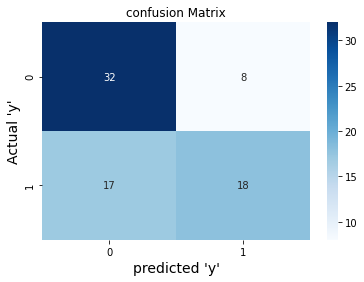

[SVC(C=1, class_weight='balanced', gamma=0.2, probability=True, random_state=0), 0.7294117647058823, 0.7060568086883876, 0.7125, 0.7040336134453782, 0.7284722222222222]
[0.6666666666666666, 0.6713762428048142, 0.6666666666666666, 0.65893043531651, 0.6571428571428571]
gnb


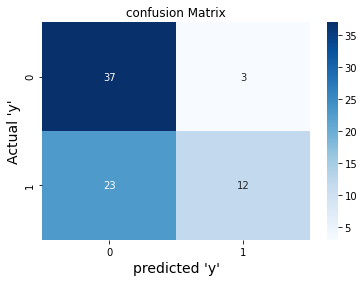

[GaussianNB(var_smoothing=0.533669923120631), 0.6779831932773109, 0.885, 0.35, 0.49718614718614723, 0.6533625730994153]
[0.6533333333333333, 0.7022222222222223, 0.6533333333333333, 0.6186666666666667, 0.6339285714285715]
lr


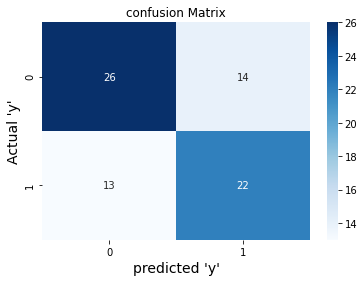

[LogisticRegression(C=100, class_weight='balanced', fit_intercept=False,
                   max_iter=500, penalty='l1', random_state=0,
                   solver='liblinear'), 0.6721008403361345, 0.673950204384987, 0.65, 0.6407356321839082, 0.6694444444444445]
[0.64, 0.6407407407407407, 0.64, 0.6402567302549474, 0.6392857142857142]
dt


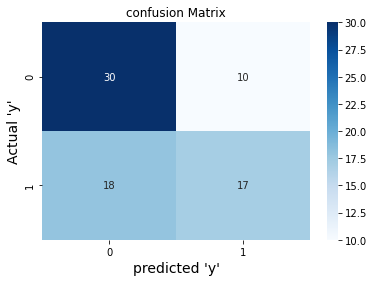

[DecisionTreeClassifier(class_weight='balanced', max_depth=5,
                       min_samples_split=100, random_state=0), 0.6952941176470588, 0.7160446570972887, 0.675, 0.6612519568716513, 0.6933479532163743]
[0.6266666666666667, 0.6271604938271605, 0.6266666666666667, 0.6195503421309874, 0.6178571428571429]
rf


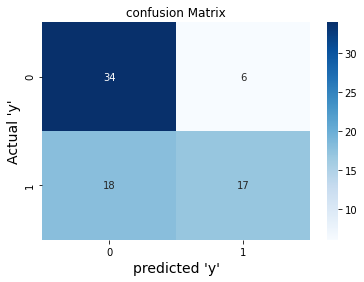

[RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=3, min_samples_split=5, random_state=0), 0.7700840336134454, 0.7727985739750445, 0.7375, 0.7459310336729692, 0.7678728070175438]
[0.68, 0.6936454849498328, 0.68, 0.6677661169415292, 0.6678571428571429]
svc 

gnb 99

lr 999

rf 999

dt 999

+---------------------+----------------+----------------+----------------+----------------+----------------+
|        Model        |    Accuracy    |   Precision    |     Recall     |    F1 Score    |      Auc       |
+---------------------+----------------+----------------+----------------+----------------+----------------+
|     Naive Bayes     | (64.11, 76.23) | (63.85, 80.99) | (64.11, 76.23) | (61.59, 74.46) | (60.9, 72.55)  |
|     Decison Tree    | (53.72, 78.33) | (56.72, 80.92) | (53.72, 78.33) | (50.17, 78.21) | (54.16, 77.55) |
|    Random Forest    | (68.75, 83.72) | (69.49, 84.48) | (68.75, 83.72) | (67.7, 83.41)  | (66.7, 82.48)  |
| L

In [26]:
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, cross_validate, StratifiedKFold
from sklearn.metrics import roc_curve, auc
import numpy as np
np.random.seed(0)
import warnings
warnings.simplefilter('ignore')
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,make_scorer,precision_score,recall_score
print(__doc__)
cv_dict={}
test_dict={}

# Choose cross-validation techniques for the inner and outer loops,
# independently of the dataset.

# E.g "GroupKFold", "LeaveOneOut", "LeaveOneGroupOut", etc.

scoring={'Accuracy':make_scorer(accuracy_score),'Precision':make_scorer(precision_score),'Recall':make_scorer(recall_score),'F1 Score':make_scorer(f1_score),'AUC':make_scorer(roc_auc_score)}

inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

mts=['svc','gnb','lr','dt','rf']
# Set up possible values of parameters to optimize over
p_grids=[[] for i in range(5)]
p_grids[0] = {"C": [1, 10, 100, 1000, 10000],"gamma": [.0001, .001, .01, .1, .2, .5]}
p_grids[1]={'var_smoothing': np.logspace(0,-9, num=100)}
p_grids[2]={"C": [1, 10, 100, 1000, 10000],"fit_intercept":[True,False],"penalty":['l1', 'l2']}
p_grids[3]={'criterion':['gini','entropy'],'max_depth':  [1, 5, 10, 50], "min_samples_split": [5, 10, 100, 500]}
p_grids[4] = { 'n_estimators': [100,200],'max_features': ['auto', 'sqrt', 'log2'],'max_depth': [3, 5, 10],'min_samples_split': [2, 5, 10],'criterion' :['gini', 'entropy']}
#p_grids[5]= {'max_depth':  [4,5,6,7,8], "n_estimators": [10, 20,50,70,100,150] }
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']
#p_grids[6] = dict(n_neighbors=k_range, weights=weight_options)
#p_grid = {"loss":["deviance"],"learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],"min_samples_split": np.linspace(0.1, 0.5, 12),"min_samples_leaf": np.linspace(0.1, 0.5, 12),"max_depth":[3,5,8],"max_features":["log2","sqrt"],"criterion": ["friedman_mse",  "mae"],"subsample":[0.5, 0.8, 0.85, 0.9, 0.95, 1.0],"n_estimators":[10]}

# ML model
models=[[] for i in range(5)]
models[0] = SVC(kernel="rbf",random_state=0,class_weight='balanced',probability=True)
models[1]=GaussianNB()
models[2]=LogisticRegression(random_state=0,solver='liblinear',max_iter=500,class_weight='balanced')
models[3]=DecisionTreeClassifier(random_state=0,class_weight='balanced')
models[4]=RandomForestClassifier(random_state=0,class_weight='balanced')
#models[5]=XGBClassifier(random_state=0,class_weight='balanced',probability=True)
#models[6]=KNeighborsClassifier()
#model=GradientBoostingClassifier(random_state=0)

#data=pd.read_csv('../dataset/covid_survey_data_sg.csv')
data=df[smell+label]
values=data.values
X=data.iloc[:, 0 : -1]
Y=list(values[:,-1])
Y=[0 if val=='Non-COVID' else 1 for val in Y]
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify= Y,  random_state = 0,test_size = 0.3)
#X_train,X_test=standarize(X_train,X_test)
st_scale=StandardScaler().fit(X_train)
X_train=pd.DataFrame(st_scale.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test=pd.DataFrame(st_scale.transform(X_test), index=X_test.index, columns=X_test.columns)

for i in range(5):
    mt=mts[i]
    print(mt)
    p_grid=p_grids[i]
    model=models[i]
    clf = GridSearchCV(estimator=model, param_grid=p_grid, cv=inner_cv,scoring=scoring,refit='AUC')
    clf.fit(X_train, Y_train)

    # Nested CV with parameter optimization
    nested_cvscore = cross_validate(clf, X=X_train, y=Y_train, cv=outer_cv,scoring=scoring)
    cv_dict[mt]=[clf.best_estimator_,nested_cvscore['test_Accuracy'].mean(),nested_cvscore['test_Precision'].mean(),nested_cvscore['test_Recall'].mean(),nested_cvscore['test_F1 Score'].mean(),nested_cvscore['test_AUC'].mean()]


    model=cv_dict[mt][0]
    model.fit(X_train,Y_train)
    Y_pred=model.predict(X_test)
    from sklearn.metrics import confusion_matrix
    cm=confusion_matrix(Y_test,Y_pred)

    import seaborn as sns
    import matplotlib.pyplot as plt     

    sns.heatmap(cm, annot=True,fmt="d",cmap='Blues')
    plt.title('confusion Matrix')
    plt.ylabel("Actual 'y'", fontdict= {'fontsize' : 14})
    plt.xlabel("predicted 'y'", fontdict= {'fontsize' : 14})
    plt.show()

    test_dict[mt]=evaluation_metrics(Y_test,Y_pred)
    #evaluation_metrics(Y_test,Y_pred)
    print(cv_dict[mt])
    print(test_dict[mt])

#     import pickle
#     with open('../dataset/cv_dict_sel_pstd_t','wb') as f:
#         pickle.dump(cv_dict,f)
#     with open('../dataset/test_dict_sel_pstd_t','wb') as f:
#         pickle.dump(test_dict,f)
        
import numpy
from pandas import read_csv
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
# load dataset
#data = read_csv('../dataset/covid_survey_data40.csv')
#values = data.values[:,1:]
values=data.values
# configure bootstrap
n_iterations = 1000
n_size = int(len(data) * 0.50)
clfs=['svc','gnb','lr','rf','dt']
stats_dict = {}
# with open('../dataset/cv_dict_sel_pstd_t','rb') as f:
#     cv_dict=pickle.load(f)
for i in range(5):
    clf=clfs[i]
    print(clf,'\n')
    # run bootstrap
    acc_stats = []
    pre_stats = []
    rec_stats = []
    f1_stats = []
    auc_stats = []
    for i in range(n_iterations):
        print('i=',i,end='\r')
        # prepare train and test sets
        train = resample(values, stratify=values[:,-1],n_samples=n_size)
        test = numpy.array([x for x in values if x.tolist() not in train.tolist()])
        train[:,-1]=np.array([0 if val=='Non-COVID' else 1 for val in list(train[:,-1])])
        test[:,-1]=np.array([0 if val=='Non-COVID' else 1 for val in list(test[:,-1])])
        X_train=pd.DataFrame(train[:,:-1])
        #X_train.columns=colnames[:-1]
        X_test=pd.DataFrame(test[:,:-1])
        #X_test.columns=colnames[:-1]
        
        st_scale=StandardScaler().fit(X_train)
        X_train=pd.DataFrame(st_scale.transform(X_train), index=X_train.index, columns=X_train.columns)
        X_test=pd.DataFrame(st_scale.transform(X_test), index=X_test.index, columns=X_test.columns)

        Y_train=list(train[:,-1])
        Y_test=list(test[:,-1])
        #X_train,X_test=standarize(X_train,X_test)
        # fit model
        model = cv_dict[clf][0]
        model.fit(X_train, Y_train)
        # evaluate model
        predictions = model.predict(X_test)
        acc_stats.append(accuracy_score(Y_test, predictions))
        pre_stats.append(precision_score(Y_test, predictions,average='weighted'))
        rec_stats.append(recall_score(Y_test, predictions,average='weighted'))
        f1_stats.append(f1_score(Y_test, predictions,average='weighted'))
        #atest=[0 if val=='Non-COVID' else 1 for val in list(Y_test)]
        #apred=[0 if val=='Non-COVID' else 1 for val in list(predictions)]
        auc_stats.append(roc_auc_score(Y_test, predictions,average='weighted'))
        #print('i=',i,' score=',score,' train shape= ',np.shape(train),' test shape= ',np.shape(test),' train ratio=',list(train[:,-1]).count('Non-COVID')/list(train[:,-1]).count('Positive'),' test_ratio=',list(test[:,-1]).count('Non-COVID')/list(test[:,-1]).count('Positive'),end='\r')
    # plot scores
    #pyplot.hist(stats)
    #pyplot.show()
    # confidence intervals
    alpha = 0.95
    p = ((1.0-alpha)/2.0) * 100
    acc_lower = max(0.0, numpy.percentile(acc_stats, p))
    pre_lower = max(0.0, numpy.percentile(pre_stats, p))
    rec_lower = max(0.0, numpy.percentile(rec_stats, p))
    f1_lower = max(0.0, numpy.percentile(f1_stats, p))
    auc_lower = max(0.0, numpy.percentile(auc_stats, p))
    p = (alpha+((1.0-alpha)/2.0)) * 100
    acc_upper = min(1.0, numpy.percentile(acc_stats, p))
    pre_upper = min(1.0, numpy.percentile(pre_stats, p))
    rec_upper = min(1.0, numpy.percentile(rec_stats, p))
    f1_upper = min(1.0, numpy.percentile(f1_stats, p))
    auc_upper = min(1.0, numpy.percentile(auc_stats, p))
    stats_dict[clf]=[(round(acc_lower*100,2),round(acc_upper*100,2)),(round(pre_lower*100,2),round(pre_upper*100,2)),(round(rec_lower*100,2),round(rec_upper*100,2)),(round(f1_lower*100,2),round(f1_upper*100,2)),(round(auc_lower*100,2),round(auc_upper*100,2))]
    #print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))
# with open('../dataset/stats_sel_pstd_dict_t','wb') as f:
#     pickle.dump(stats_dict,f)
    


from prettytable import PrettyTable
#generic
x = PrettyTable()
x.field_names = [ "Model", 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Auc']
x.add_row(['Naive Bayes']+stats_dict['gnb'])
x.add_row(['Decison Tree']+stats_dict['dt'])
x.add_row(['Random Forest']+stats_dict['rf'])
x.add_row(['Logistic Regression']+stats_dict['lr'])
x.add_row(['SVM']+stats_dict['svc'])
print(x)

### Taste Test

Automatically created module for IPython interactive environment
svc


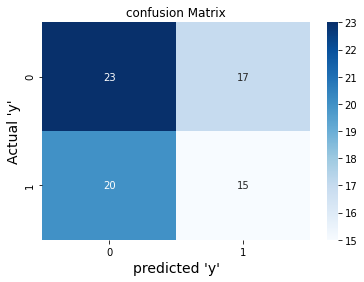

[SVC(C=1, class_weight='balanced', gamma=0.2, probability=True, random_state=0), 0.5974789915966386, 0.5615995872033024, 0.6125, 0.5844146534469115, 0.5986476608187135]
[0.5066666666666667, 0.5040213178294572, 0.5066666666666667, 0.504537553197866, 0.5017857142857143]
gnb


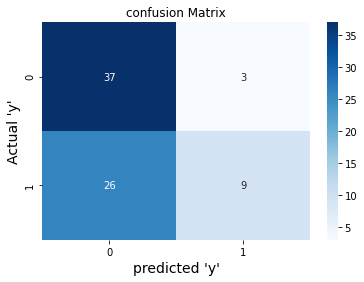

[GaussianNB(var_smoothing=0.8111308307896871), 0.6092436974789915, 0.8428571428571429, 0.2125, 0.3309756604951113, 0.5793494152046783]
[0.6133333333333333, 0.6632275132275133, 0.6133333333333333, 0.5618949252909179, 0.5910714285714286]
lr


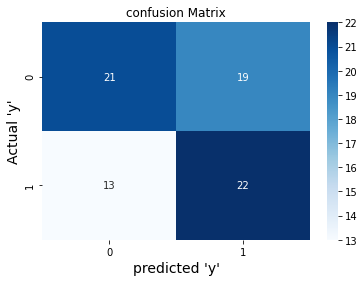

[LogisticRegression(C=1, class_weight='balanced', fit_intercept=False,
                   max_iter=500, random_state=0, solver='liblinear'), 0.47714285714285715, 0.42755894260538224, 0.4125, 0.41754176116801256, 0.4720394736842105]
[0.5733333333333334, 0.579818268770923, 0.5733333333333334, 0.5728781412991939, 0.5767857142857142]
dt


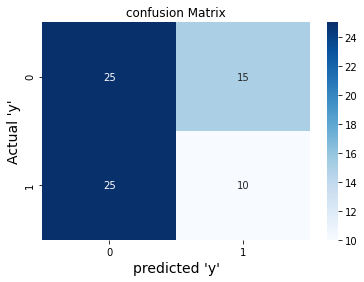

[DecisionTreeClassifier(class_weight='balanced', max_depth=5,
                       min_samples_split=100, random_state=0), 0.5801680672268907, 0.5534632034632034, 0.475, 0.5076812947401182, 0.572295321637427]
[0.4666666666666667, 0.4533333333333333, 0.4666666666666667, 0.4518518518518518, 0.4553571428571428]
rf


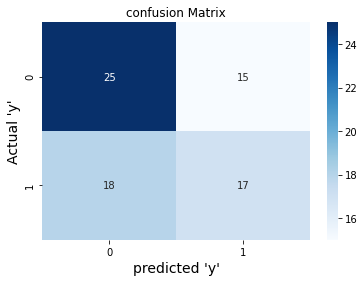

[RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=10, n_estimators=200, random_state=0), 0.6492436974789916, 0.6322926093514328, 0.575, 0.5998504832208947, 0.6439327485380117]
[0.56, 0.5579941860465116, 0.56, 0.5581010609602589, 0.5553571428571429]
svc 

gnb 99

lr 999

rf 999

dt 999

+---------------------+----------------+----------------+----------------+----------------+----------------+
|        Model        |    Accuracy    |   Precision    |     Recall     |    F1 Score    |      Auc       |
+---------------------+----------------+----------------+----------------+----------------+----------------+
|     Naive Bayes     | (54.41, 67.44) | (53.82, 76.63) | (54.41, 67.44) | (51.6, 63.72)  | (53.07, 64.17) |
|     Decison Tree    | (43.84, 66.19) | (44.15, 72.53) | (43.84, 66.19) | (37.45, 64.97) | (45.81, 64.87) |
|    Random Forest    | (56.92, 71.43) | (57.21, 71.82) | (56.92, 71.43) | (56.22, 71.3)  | (56.97, 71.19) |
| Log

In [27]:
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, cross_validate, StratifiedKFold
from sklearn.metrics import roc_curve, auc
import numpy as np
np.random.seed(0)
import warnings
warnings.simplefilter('ignore')
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,make_scorer,precision_score,recall_score
print(__doc__)
cv_dict={}
test_dict={}

# Choose cross-validation techniques for the inner and outer loops,
# independently of the dataset.

# E.g "GroupKFold", "LeaveOneOut", "LeaveOneGroupOut", etc.

scoring={'Accuracy':make_scorer(accuracy_score),'Precision':make_scorer(precision_score),'Recall':make_scorer(recall_score),'F1 Score':make_scorer(f1_score),'AUC':make_scorer(roc_auc_score)}

inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

mts=['svc','gnb','lr','dt','rf']
# Set up possible values of parameters to optimize over
p_grids=[[] for i in range(5)]
p_grids[0] = {"C": [1, 10, 100, 1000, 10000],"gamma": [.0001, .001, .01, .1, .2, .5]}
p_grids[1]={'var_smoothing': np.logspace(0,-9, num=100)}
p_grids[2]={"C": [1, 10, 100, 1000, 10000],"fit_intercept":[True,False],"penalty":['l1', 'l2']}
p_grids[3]={'criterion':['gini','entropy'],'max_depth':  [1, 5, 10, 50], "min_samples_split": [5, 10, 100, 500]}
p_grids[4] = { 'n_estimators': [100,200],'max_features': ['auto', 'sqrt', 'log2'],'max_depth': [3, 5, 10],'min_samples_split': [2, 5, 10],'criterion' :['gini', 'entropy']}
#p_grids[5]= {'max_depth':  [4,5,6,7,8], "n_estimators": [10, 20,50,70,100,150] }
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']
#p_grids[6] = dict(n_neighbors=k_range, weights=weight_options)
#p_grid = {"loss":["deviance"],"learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],"min_samples_split": np.linspace(0.1, 0.5, 12),"min_samples_leaf": np.linspace(0.1, 0.5, 12),"max_depth":[3,5,8],"max_features":["log2","sqrt"],"criterion": ["friedman_mse",  "mae"],"subsample":[0.5, 0.8, 0.85, 0.9, 0.95, 1.0],"n_estimators":[10]}

# ML model
models=[[] for i in range(5)]
models[0] = SVC(kernel="rbf",random_state=0,class_weight='balanced',probability=True)
models[1]=GaussianNB()
models[2]=LogisticRegression(random_state=0,solver='liblinear',max_iter=500,class_weight='balanced')
models[3]=DecisionTreeClassifier(random_state=0,class_weight='balanced')
models[4]=RandomForestClassifier(random_state=0,class_weight='balanced')
#models[5]=XGBClassifier(random_state=0,class_weight='balanced',probability=True)
#models[6]=KNeighborsClassifier()
#model=GradientBoostingClassifier(random_state=0)

#data=pd.read_csv('../dataset/covid_survey_data_sg.csv')
data=df[taste+label]
values=data.values
X=data.iloc[:, 0 : -1]
Y=list(values[:,-1])
Y=[0 if val=='Non-COVID' else 1 for val in Y]
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify= Y,  random_state = 0,test_size = 0.3)
#X_train,X_test=standarize(X_train,X_test)
st_scale=StandardScaler().fit(X_train)
X_train=pd.DataFrame(st_scale.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test=pd.DataFrame(st_scale.transform(X_test), index=X_test.index, columns=X_test.columns)

for i in range(5):
    mt=mts[i]
    print(mt)
    p_grid=p_grids[i]
    model=models[i]
    clf = GridSearchCV(estimator=model, param_grid=p_grid, cv=inner_cv,scoring=scoring,refit='AUC')
    clf.fit(X_train, Y_train)

    # Nested CV with parameter optimization
    nested_cvscore = cross_validate(clf, X=X_train, y=Y_train, cv=outer_cv,scoring=scoring)
    cv_dict[mt]=[clf.best_estimator_,nested_cvscore['test_Accuracy'].mean(),nested_cvscore['test_Precision'].mean(),nested_cvscore['test_Recall'].mean(),nested_cvscore['test_F1 Score'].mean(),nested_cvscore['test_AUC'].mean()]


    model=cv_dict[mt][0]
    model.fit(X_train,Y_train)
    Y_pred=model.predict(X_test)
    from sklearn.metrics import confusion_matrix
    cm=confusion_matrix(Y_test,Y_pred)

    import seaborn as sns
    import matplotlib.pyplot as plt     

    sns.heatmap(cm, annot=True,fmt="d",cmap='Blues')
    plt.title('confusion Matrix')
    plt.ylabel("Actual 'y'", fontdict= {'fontsize' : 14})
    plt.xlabel("predicted 'y'", fontdict= {'fontsize' : 14})
    plt.show()

    test_dict[mt]=evaluation_metrics(Y_test,Y_pred)
    #evaluation_metrics(Y_test,Y_pred)
    print(cv_dict[mt])
    print(test_dict[mt])

#     import pickle
#     with open('../dataset/cv_dict_sel_pstd_t','wb') as f:
#         pickle.dump(cv_dict,f)
#     with open('../dataset/test_dict_sel_pstd_t','wb') as f:
#         pickle.dump(test_dict,f)
        
import numpy
from pandas import read_csv
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
# load dataset
#data = read_csv('../dataset/covid_survey_data40.csv')
#values = data.values[:,1:]
values=data.values
# configure bootstrap
n_iterations = 1000
n_size = int(len(data) * 0.50)
clfs=['svc','gnb','lr','rf','dt']
stats_dict = {}
# with open('../dataset/cv_dict_sel_pstd_t','rb') as f:
#     cv_dict=pickle.load(f)
for i in range(5):
    clf=clfs[i]
    print(clf,'\n')
    # run bootstrap
    acc_stats = []
    pre_stats = []
    rec_stats = []
    f1_stats = []
    auc_stats = []
    for i in range(n_iterations):
        print('i=',i,end='\r')
        # prepare train and test sets
        train = resample(values, stratify=values[:,-1],n_samples=n_size)
        test = numpy.array([x for x in values if x.tolist() not in train.tolist()])
        train[:,-1]=np.array([0 if val=='Non-COVID' else 1 for val in list(train[:,-1])])
        test[:,-1]=np.array([0 if val=='Non-COVID' else 1 for val in list(test[:,-1])])
        X_train=pd.DataFrame(train[:,:-1])
        #X_train.columns=colnames[:-1]
        X_test=pd.DataFrame(test[:,:-1])
        #X_test.columns=colnames[:-1]
        
        st_scale=StandardScaler().fit(X_train)
        X_train=pd.DataFrame(st_scale.transform(X_train), index=X_train.index, columns=X_train.columns)
        X_test=pd.DataFrame(st_scale.transform(X_test), index=X_test.index, columns=X_test.columns)

        Y_train=list(train[:,-1])
        Y_test=list(test[:,-1])
        #X_train,X_test=standarize(X_train,X_test)
        # fit model
        model = cv_dict[clf][0]
        model.fit(X_train, Y_train)
        # evaluate model
        predictions = model.predict(X_test)
        acc_stats.append(accuracy_score(Y_test, predictions))
        pre_stats.append(precision_score(Y_test, predictions,average='weighted'))
        rec_stats.append(recall_score(Y_test, predictions,average='weighted'))
        f1_stats.append(f1_score(Y_test, predictions,average='weighted'))
        #atest=[0 if val=='Non-COVID' else 1 for val in list(Y_test)]
        #apred=[0 if val=='Non-COVID' else 1 for val in list(predictions)]
        auc_stats.append(roc_auc_score(Y_test, predictions,average='weighted'))
        #print('i=',i,' score=',score,' train shape= ',np.shape(train),' test shape= ',np.shape(test),' train ratio=',list(train[:,-1]).count('Non-COVID')/list(train[:,-1]).count('Positive'),' test_ratio=',list(test[:,-1]).count('Non-COVID')/list(test[:,-1]).count('Positive'),end='\r')
    # plot scores
    #pyplot.hist(stats)
    #pyplot.show()
    # confidence intervals
    alpha = 0.95
    p = ((1.0-alpha)/2.0) * 100
    acc_lower = max(0.0, numpy.percentile(acc_stats, p))
    pre_lower = max(0.0, numpy.percentile(pre_stats, p))
    rec_lower = max(0.0, numpy.percentile(rec_stats, p))
    f1_lower = max(0.0, numpy.percentile(f1_stats, p))
    auc_lower = max(0.0, numpy.percentile(auc_stats, p))
    p = (alpha+((1.0-alpha)/2.0)) * 100
    acc_upper = min(1.0, numpy.percentile(acc_stats, p))
    pre_upper = min(1.0, numpy.percentile(pre_stats, p))
    rec_upper = min(1.0, numpy.percentile(rec_stats, p))
    f1_upper = min(1.0, numpy.percentile(f1_stats, p))
    auc_upper = min(1.0, numpy.percentile(auc_stats, p))
    stats_dict[clf]=[(round(acc_lower*100,2),round(acc_upper*100,2)),(round(pre_lower*100,2),round(pre_upper*100,2)),(round(rec_lower*100,2),round(rec_upper*100,2)),(round(f1_lower*100,2),round(f1_upper*100,2)),(round(auc_lower*100,2),round(auc_upper*100,2))]
    #print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))
# with open('../dataset/stats_sel_pstd_dict_t','wb') as f:
#     pickle.dump(stats_dict,f)
    


from prettytable import PrettyTable
#generic
x = PrettyTable()
x.field_names = [ "Model", 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Auc']
x.add_row(['Naive Bayes']+stats_dict['gnb'])
x.add_row(['Decison Tree']+stats_dict['dt'])
x.add_row(['Random Forest']+stats_dict['rf'])
x.add_row(['Logistic Regression']+stats_dict['lr'])
x.add_row(['SVM']+stats_dict['svc'])
print(x)

### Taste+Smell

Automatically created module for IPython interactive environment
svc


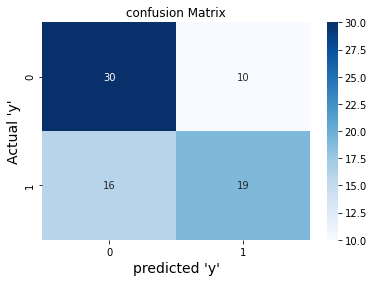

[SVC(C=1, class_weight='balanced', gamma=0.1, probability=True, random_state=0), 0.7472268907563024, 0.7176470588235294, 0.7625, 0.7383838383838384, 0.748501461988304]
[0.6533333333333333, 0.6535732133933033, 0.6533333333333333, 0.6491763565891472, 0.6464285714285714]
gnb


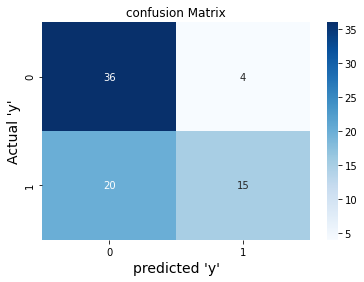

[GaussianNB(var_smoothing=0.23101297000831597), 0.6433613445378151, 0.7555555555555556, 0.3625, 0.4818967698967699, 0.6221856725146199]
[0.68, 0.7112781954887217, 0.68, 0.6592592592592592, 0.6642857142857144]
lr


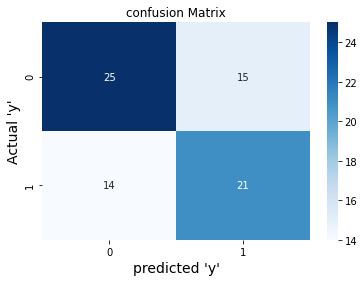

[LogisticRegression(C=10, class_weight='balanced', max_iter=500, penalty='l1',
                   random_state=0, solver='liblinear'), 0.6838655462184875, 0.67, 0.6875, 0.6626083506492633, 0.6829312865497077]
[0.6133333333333333, 0.6141025641025641, 0.6133333333333333, 0.6136090806442028, 0.6125]
dt


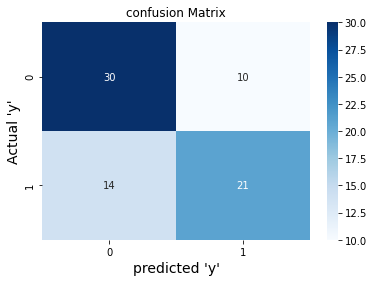

[DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, min_samples_split=5, random_state=0), 0.7588235294117648, 0.6995375752409, 0.85, 0.7646726854157195, 0.76593567251462]
[0.68, 0.6797653958944281, 0.68, 0.677922077922078, 0.675]
rf


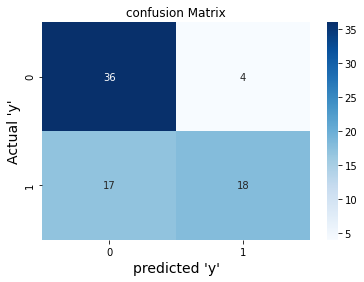

[RandomForestClassifier(class_weight='balanced', max_depth=5,
                       min_samples_split=5, n_estimators=200, random_state=0), 0.7816806722689076, 0.7786435786435787, 0.7625, 0.7613488251059409, 0.7803728070175439]
[0.72, 0.744082332761578, 0.72, 0.7076400679117147, 0.7071428571428571]
svc 

gnb 99

lr 999267335466621920994

rf 999

dt 999

+---------------------+----------------+----------------+----------------+----------------+----------------+
|        Model        |    Accuracy    |   Precision    |     Recall     |    F1 Score    |      Auc       |
+---------------------+----------------+----------------+----------------+----------------+----------------+
|     Naive Bayes     | (60.13, 72.92) | (59.79, 77.43) | (60.13, 72.92) | (58.93, 71.11) | (58.64, 70.56) |
|     Decison Tree    | (59.57, 77.47) | (60.13, 77.69) | (59.57, 77.47) | (59.68, 77.49) | (59.66, 77.27) |
|    Random Forest    | (67.38, 80.15) | (67.76, 80.83) | (67.38, 80.15) | (67.25, 79.87) | (67.06

In [28]:
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, cross_validate, StratifiedKFold
from sklearn.metrics import roc_curve, auc
import numpy as np
np.random.seed(0)
import warnings
warnings.simplefilter('ignore')
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,make_scorer,precision_score,recall_score
print(__doc__)
cv_dict={}
test_dict={}

# Choose cross-validation techniques for the inner and outer loops,
# independently of the dataset.

# E.g "GroupKFold", "LeaveOneOut", "LeaveOneGroupOut", etc.

scoring={'Accuracy':make_scorer(accuracy_score),'Precision':make_scorer(precision_score),'Recall':make_scorer(recall_score),'F1 Score':make_scorer(f1_score),'AUC':make_scorer(roc_auc_score)}

inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

mts=['svc','gnb','lr','dt','rf']
# Set up possible values of parameters to optimize over
p_grids=[[] for i in range(5)]
p_grids[0] = {"C": [1, 10, 100, 1000, 10000],"gamma": [.0001, .001, .01, .1, .2, .5]}
p_grids[1]={'var_smoothing': np.logspace(0,-9, num=100)}
p_grids[2]={"C": [1, 10, 100, 1000, 10000],"fit_intercept":[True,False],"penalty":['l1', 'l2']}
p_grids[3]={'criterion':['gini','entropy'],'max_depth':  [1, 5, 10, 50], "min_samples_split": [5, 10, 100, 500]}
p_grids[4] = { 'n_estimators': [100,200],'max_features': ['auto', 'sqrt', 'log2'],'max_depth': [3, 5, 10],'min_samples_split': [2, 5, 10],'criterion' :['gini', 'entropy']}
#p_grids[5]= {'max_depth':  [4,5,6,7,8], "n_estimators": [10, 20,50,70,100,150] }
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']
#p_grids[6] = dict(n_neighbors=k_range, weights=weight_options)
#p_grid = {"loss":["deviance"],"learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],"min_samples_split": np.linspace(0.1, 0.5, 12),"min_samples_leaf": np.linspace(0.1, 0.5, 12),"max_depth":[3,5,8],"max_features":["log2","sqrt"],"criterion": ["friedman_mse",  "mae"],"subsample":[0.5, 0.8, 0.85, 0.9, 0.95, 1.0],"n_estimators":[10]}

# ML model
models=[[] for i in range(5)]
models[0] = SVC(kernel="rbf",random_state=0,class_weight='balanced',probability=True)
models[1]=GaussianNB()
models[2]=LogisticRegression(random_state=0,solver='liblinear',max_iter=500,class_weight='balanced')
models[3]=DecisionTreeClassifier(random_state=0,class_weight='balanced')
models[4]=RandomForestClassifier(random_state=0,class_weight='balanced')
#models[5]=XGBClassifier(random_state=0,class_weight='balanced',probability=True)
#models[6]=KNeighborsClassifier()
#model=GradientBoostingClassifier(random_state=0)

#data=pd.read_csv('../dataset/covid_survey_data_sg.csv')
data=df[smell+taste+label]
values=data.values
X=data.iloc[:, 0 : -1]
Y=list(values[:,-1])
Y=[0 if val=='Non-COVID' else 1 for val in Y]
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify= Y,  random_state = 0,test_size = 0.3)
#X_train,X_test=standarize(X_train,X_test)
st_scale=StandardScaler().fit(X_train)
X_train=pd.DataFrame(st_scale.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test=pd.DataFrame(st_scale.transform(X_test), index=X_test.index, columns=X_test.columns)

for i in range(5):
    mt=mts[i]
    print(mt)
    p_grid=p_grids[i]
    model=models[i]
    clf = GridSearchCV(estimator=model, param_grid=p_grid, cv=inner_cv,scoring=scoring,refit='AUC')
    clf.fit(X_train, Y_train)

    # Nested CV with parameter optimization
    nested_cvscore = cross_validate(clf, X=X_train, y=Y_train, cv=outer_cv,scoring=scoring)
    cv_dict[mt]=[clf.best_estimator_,nested_cvscore['test_Accuracy'].mean(),nested_cvscore['test_Precision'].mean(),nested_cvscore['test_Recall'].mean(),nested_cvscore['test_F1 Score'].mean(),nested_cvscore['test_AUC'].mean()]


    model=cv_dict[mt][0]
    model.fit(X_train,Y_train)
    Y_pred=model.predict(X_test)
    from sklearn.metrics import confusion_matrix
    cm=confusion_matrix(Y_test,Y_pred)

    import seaborn as sns
    import matplotlib.pyplot as plt     

    sns.heatmap(cm, annot=True,fmt="d",cmap='Blues')
    plt.title('confusion Matrix')
    plt.ylabel("Actual 'y'", fontdict= {'fontsize' : 14})
    plt.xlabel("predicted 'y'", fontdict= {'fontsize' : 14})
    plt.show()

    test_dict[mt]=evaluation_metrics(Y_test,Y_pred)
    #evaluation_metrics(Y_test,Y_pred)
    print(cv_dict[mt])
    print(test_dict[mt])

#     import pickle
#     with open('../dataset/cv_dict_sel_pstd_t','wb') as f:
#         pickle.dump(cv_dict,f)
#     with open('../dataset/test_dict_sel_pstd_t','wb') as f:
#         pickle.dump(test_dict,f)
        
import numpy
from pandas import read_csv
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
# load dataset
#data = read_csv('../dataset/covid_survey_data40.csv')
#values = data.values[:,1:]
values=data.values
# configure bootstrap
n_iterations = 1000
n_size = int(len(data) * 0.50)
clfs=['svc','gnb','lr','rf','dt']
stats_dict = {}
# with open('../dataset/cv_dict_sel_pstd_t','rb') as f:
#     cv_dict=pickle.load(f)
for i in range(5):
    clf=clfs[i]
    print(clf,'\n')
    # run bootstrap
    acc_stats = []
    pre_stats = []
    rec_stats = []
    f1_stats = []
    auc_stats = []
    for i in range(n_iterations):
        print('i=',i,end='\r')
        # prepare train and test sets
        train = resample(values, stratify=values[:,-1],n_samples=n_size)
        test = numpy.array([x for x in values if x.tolist() not in train.tolist()])
        train[:,-1]=np.array([0 if val=='Non-COVID' else 1 for val in list(train[:,-1])])
        test[:,-1]=np.array([0 if val=='Non-COVID' else 1 for val in list(test[:,-1])])
        X_train=pd.DataFrame(train[:,:-1])
        #X_train.columns=colnames[:-1]
        X_test=pd.DataFrame(test[:,:-1])
        #X_test.columns=colnames[:-1]
        
        st_scale=StandardScaler().fit(X_train)
        X_train=pd.DataFrame(st_scale.transform(X_train), index=X_train.index, columns=X_train.columns)
        X_test=pd.DataFrame(st_scale.transform(X_test), index=X_test.index, columns=X_test.columns)

        Y_train=list(train[:,-1])
        Y_test=list(test[:,-1])
        #X_train,X_test=standarize(X_train,X_test)
        # fit model
        model = cv_dict[clf][0]
        model.fit(X_train, Y_train)
        # evaluate model
        predictions = model.predict(X_test)
        acc_stats.append(accuracy_score(Y_test, predictions))
        pre_stats.append(precision_score(Y_test, predictions,average='weighted'))
        rec_stats.append(recall_score(Y_test, predictions,average='weighted'))
        f1_stats.append(f1_score(Y_test, predictions,average='weighted'))
        #atest=[0 if val=='Non-COVID' else 1 for val in list(Y_test)]
        #apred=[0 if val=='Non-COVID' else 1 for val in list(predictions)]
        auc_stats.append(roc_auc_score(Y_test, predictions,average='weighted'))
        #print('i=',i,' score=',score,' train shape= ',np.shape(train),' test shape= ',np.shape(test),' train ratio=',list(train[:,-1]).count('Non-COVID')/list(train[:,-1]).count('Positive'),' test_ratio=',list(test[:,-1]).count('Non-COVID')/list(test[:,-1]).count('Positive'),end='\r')
    # plot scores
    #pyplot.hist(stats)
    #pyplot.show()
    # confidence intervals
    alpha = 0.95
    p = ((1.0-alpha)/2.0) * 100
    acc_lower = max(0.0, numpy.percentile(acc_stats, p))
    pre_lower = max(0.0, numpy.percentile(pre_stats, p))
    rec_lower = max(0.0, numpy.percentile(rec_stats, p))
    f1_lower = max(0.0, numpy.percentile(f1_stats, p))
    auc_lower = max(0.0, numpy.percentile(auc_stats, p))
    p = (alpha+((1.0-alpha)/2.0)) * 100
    acc_upper = min(1.0, numpy.percentile(acc_stats, p))
    pre_upper = min(1.0, numpy.percentile(pre_stats, p))
    rec_upper = min(1.0, numpy.percentile(rec_stats, p))
    f1_upper = min(1.0, numpy.percentile(f1_stats, p))
    auc_upper = min(1.0, numpy.percentile(auc_stats, p))
    stats_dict[clf]=[(round(acc_lower*100,2),round(acc_upper*100,2)),(round(pre_lower*100,2),round(pre_upper*100,2)),(round(rec_lower*100,2),round(rec_upper*100,2)),(round(f1_lower*100,2),round(f1_upper*100,2)),(round(auc_lower*100,2),round(auc_upper*100,2))]
    #print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))
# with open('../dataset/stats_sel_pstd_dict_t','wb') as f:
#     pickle.dump(stats_dict,f)
    


from prettytable import PrettyTable
#generic
x = PrettyTable()
x.field_names = [ "Model", 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Auc']
x.add_row(['Naive Bayes']+stats_dict['gnb'])
x.add_row(['Decison Tree']+stats_dict['dt'])
x.add_row(['Random Forest']+stats_dict['rf'])
x.add_row(['Logistic Regression']+stats_dict['lr'])
x.add_row(['SVM']+stats_dict['svc'])
print(x)

### Generic+Smell+Taste

In [29]:
def standarize(X_train,X_test):
    X_train_num=X_train[list(X_train.columns.values[0:13])]
    X_train_cat=X_train[list(X_train.columns.values[13:])]
    #labels=list(X_train['Diagnosed'])


    X_test_num=X_test[list(X_test.columns.values[0:13])]
    X_test_cat=X_test[list(X_test.columns.values[13:])]
    #labels=list(X_test['Diagnosed'])

    st_scale=StandardScaler().fit(X_train_num)
    X_train_num=pd.DataFrame(st_scale.transform(X_train_num), index=X_train_num.index, columns=X_train_num.columns)
    X_test_num=pd.DataFrame(st_scale.transform(X_test_num), index=X_test_num.index, columns=X_test_num.columns)

    X_train=pd.concat([X_train_num,X_train_cat],axis=1)
    X_test=pd.concat([X_test_num,X_test_cat],axis=1)
    return X_train,X_test

Automatically created module for IPython interactive environment
svc


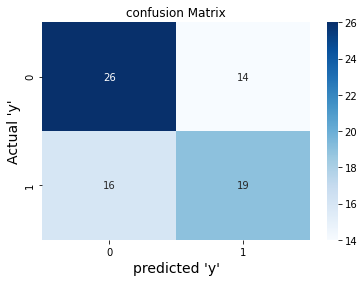

[SVC(C=10, class_weight='balanced', gamma=0.001, probability=True,
    random_state=0), 0.7640336134453782, 0.7815350877192981, 0.7125, 0.7342808661926309, 0.7597587719298246]
[0.6, 0.5988455988455988, 0.6, 0.5989956958393113, 0.5964285714285714]
gnb


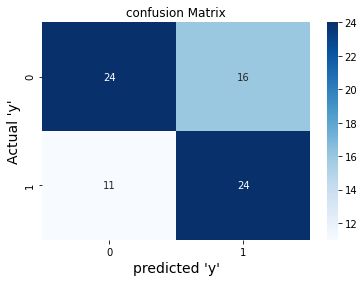

[GaussianNB(var_smoothing=8.111308307896873e-08), 0.6894117647058823, 0.7305378831694621, 0.5875, 0.6388834154351396, 0.6817616959064328]
[0.64, 0.6457142857142858, 0.64, 0.64, 0.6428571428571428]
lr


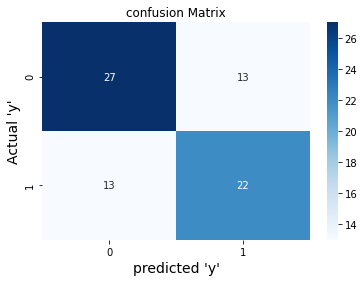

[LogisticRegression(C=1, class_weight='balanced', fit_intercept=False,
                   max_iter=500, random_state=0, solver='liblinear'), 0.7527731092436976, 0.7623577660729364, 0.7, 0.7233862433862434, 0.7482456140350877]
[0.6533333333333333, 0.6533333333333333, 0.6533333333333333, 0.6533333333333333, 0.6517857142857144]
dt


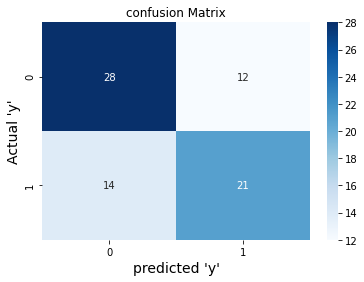

[DecisionTreeClassifier(class_weight='balanced', max_depth=1,
                       min_samples_split=5, random_state=0), 0.7870588235294118, 0.7943137254901961, 0.725, 0.753540008378718, 0.7820906432748538]
[0.6533333333333333, 0.6525252525252525, 0.6533333333333333, 0.6524629363940697, 0.6499999999999999]
rf


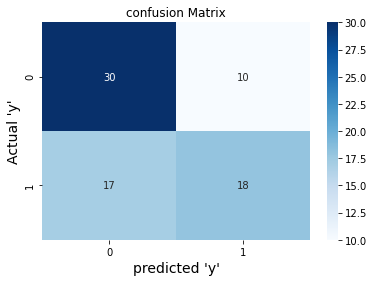

[RandomForestClassifier(class_weight='balanced', max_depth=3,
                       min_samples_split=5, n_estimators=200, random_state=0), 0.8215126050420167, 0.8743283032756717, 0.7375, 0.7889401148021837, 0.8149488304093568]
[0.64, 0.6404255319148936, 0.64, 0.6344827586206897, 0.6321428571428571]
svc 

gnb 997240245526634861

lr 999

rf 999

dt 999

+---------------------+----------------+----------------+----------------+----------------+----------------+
|        Model        |    Accuracy    |   Precision    |     Recall     |    F1 Score    |      Auc       |
+---------------------+----------------+----------------+----------------+----------------+----------------+
|     Naive Bayes     | (49.67, 74.84) | (54.54, 76.34) | (49.67, 74.84) | (43.78, 74.56) | (52.04, 74.23) |
|     Decison Tree    | (59.49, 77.5)  | (63.3, 79.13)  | (59.49, 77.5)  | (55.71, 77.47) | (58.1, 77.18)  |
|    Random Forest    |  (68.0, 80.0)  | (68.68, 80.97) |  (68.0, 80.0)  | (66.95, 79.76) | (66.97,

In [30]:
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, cross_validate, StratifiedKFold
from sklearn.metrics import roc_curve, auc
import numpy as np
np.random.seed(0)
import warnings
warnings.simplefilter('ignore')
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,make_scorer,precision_score,recall_score
print(__doc__)
cv_dict={}
test_dict={}

# Choose cross-validation techniques for the inner and outer loops,
# independently of the dataset.

# E.g "GroupKFold", "LeaveOneOut", "LeaveOneGroupOut", etc.

scoring={'Accuracy':make_scorer(accuracy_score),'Precision':make_scorer(precision_score),'Recall':make_scorer(recall_score),'F1 Score':make_scorer(f1_score),'AUC':make_scorer(roc_auc_score)}

inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

mts=['svc','gnb','lr','dt','rf']
# Set up possible values of parameters to optimize over
p_grids=[[] for i in range(5)]
p_grids[0] = {"C": [1, 10, 100, 1000, 10000],"gamma": [.0001, .001, .01, .1, .2, .5]}
p_grids[1]={'var_smoothing': np.logspace(0,-9, num=100)}
p_grids[2]={"C": [1, 10, 100, 1000, 10000],"fit_intercept":[True,False],"penalty":['l1', 'l2']}
p_grids[3]={'criterion':['gini','entropy'],'max_depth':  [1, 5, 10, 50], "min_samples_split": [5, 10, 100, 500]}
p_grids[4] = { 'n_estimators': [100,200],'max_features': ['auto', 'sqrt', 'log2'],'max_depth': [3, 5, 10],'min_samples_split': [2, 5, 10],'criterion' :['gini', 'entropy']}
#p_grids[5]= {'max_depth':  [4,5,6,7,8], "n_estimators": [10, 20,50,70,100,150] }
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']
#p_grids[6] = dict(n_neighbors=k_range, weights=weight_options)
#p_grid = {"loss":["deviance"],"learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],"min_samples_split": np.linspace(0.1, 0.5, 12),"min_samples_leaf": np.linspace(0.1, 0.5, 12),"max_depth":[3,5,8],"max_features":["log2","sqrt"],"criterion": ["friedman_mse",  "mae"],"subsample":[0.5, 0.8, 0.85, 0.9, 0.95, 1.0],"n_estimators":[10]}

# ML model
models=[[] for i in range(5)]
models[0] = SVC(kernel="rbf",random_state=0,class_weight='balanced',probability=True)
models[1]=GaussianNB()
models[2]=LogisticRegression(random_state=0,solver='liblinear',max_iter=500,class_weight='balanced')
models[3]=DecisionTreeClassifier(random_state=0,class_weight='balanced')
models[4]=RandomForestClassifier(random_state=0,class_weight='balanced')
#models[5]=XGBClassifier(random_state=0,class_weight='balanced',probability=True)
#models[6]=KNeighborsClassifier()
#model=GradientBoostingClassifier(random_state=0)

#data=pd.read_csv('../dataset/covid_survey_data_sg.csv')
data=df[smell+taste+generic+label]
values=data.values
X=data.iloc[:, 0 : -1]
Y=list(values[:,-1])
Y=[0 if val=='Non-COVID' else 1 for val in Y]
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify= Y,  random_state = 0,test_size = 0.3)
X_train,X_test=standarize(X_train,X_test)
#st_scale=StandardScaler().fit(X_train)
#X_train=pd.DataFrame(st_scale.transform(X_train), index=X_train.index, columns=X_train.columns)
#X_test=pd.DataFrame(st_scale.transform(X_test), index=X_test.index, columns=X_test.columns)

for i in range(5):
    mt=mts[i]
    print(mt)
    p_grid=p_grids[i]
    model=models[i]
    clf = GridSearchCV(estimator=model, param_grid=p_grid, cv=inner_cv,scoring=scoring,refit='AUC')
    clf.fit(X_train, Y_train)

    # Nested CV with parameter optimization
    nested_cvscore = cross_validate(clf, X=X_train, y=Y_train, cv=outer_cv,scoring=scoring)
    cv_dict[mt]=[clf.best_estimator_,nested_cvscore['test_Accuracy'].mean(),nested_cvscore['test_Precision'].mean(),nested_cvscore['test_Recall'].mean(),nested_cvscore['test_F1 Score'].mean(),nested_cvscore['test_AUC'].mean()]


    model=cv_dict[mt][0]
    model.fit(X_train,Y_train)
    Y_pred=model.predict(X_test)
    from sklearn.metrics import confusion_matrix
    cm=confusion_matrix(Y_test,Y_pred)

    import seaborn as sns
    import matplotlib.pyplot as plt     

    sns.heatmap(cm, annot=True,fmt="d",cmap='Blues')
    plt.title('confusion Matrix')
    plt.ylabel("Actual 'y'", fontdict= {'fontsize' : 14})
    plt.xlabel("predicted 'y'", fontdict= {'fontsize' : 14})
    plt.show()

    test_dict[mt]=evaluation_metrics(Y_test,Y_pred)
    #evaluation_metrics(Y_test,Y_pred)
    print(cv_dict[mt])
    print(test_dict[mt])

#     import pickle
#     with open('../dataset/cv_dict_sel_pstd_t','wb') as f:
#         pickle.dump(cv_dict,f)
#     with open('../dataset/test_dict_sel_pstd_t','wb') as f:
#         pickle.dump(test_dict,f)
        
import numpy
from pandas import read_csv
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
# load dataset
#data = read_csv('../dataset/covid_survey_data40.csv')
#values = data.values[:,1:]
values=data.values
# configure bootstrap
n_iterations = 1000
n_size = int(len(data) * 0.50)
clfs=['svc','gnb','lr','rf','dt']
stats_dict = {}
# with open('../dataset/cv_dict_sel_pstd_t','rb') as f:
#     cv_dict=pickle.load(f)
for i in range(5):
    clf=clfs[i]
    print(clf,'\n')
    # run bootstrap
    acc_stats = []
    pre_stats = []
    rec_stats = []
    f1_stats = []
    auc_stats = []
    for i in range(n_iterations):
        print('i=',i,end='\r')
        # prepare train and test sets
        train = resample(values, stratify=values[:,-1],n_samples=n_size)
        test = numpy.array([x for x in values if x.tolist() not in train.tolist()])
        train[:,-1]=np.array([0 if val=='Non-COVID' else 1 for val in list(train[:,-1])])
        test[:,-1]=np.array([0 if val=='Non-COVID' else 1 for val in list(test[:,-1])])
        X_train=pd.DataFrame(train[:,:-1])
        #X_train.columns=colnames[:-1]
        X_test=pd.DataFrame(test[:,:-1])
        #X_test.columns=colnames[:-1]
        
        #st_scale=StandardScaler().fit(X_train)
        #X_train=pd.DataFrame(st_scale.transform(X_train), index=X_train.index, columns=X_train.columns)
        #X_test=pd.DataFrame(st_scale.transform(X_test), index=X_test.index, columns=X_test.columns)

        Y_train=list(train[:,-1])
        Y_test=list(test[:,-1])
        X_train,X_test=standarize(X_train,X_test)
        # fit model
        model = cv_dict[clf][0]
        model.fit(X_train, Y_train)
        # evaluate model
        predictions = model.predict(X_test)
        acc_stats.append(accuracy_score(Y_test, predictions))
        pre_stats.append(precision_score(Y_test, predictions,average='weighted'))
        rec_stats.append(recall_score(Y_test, predictions,average='weighted'))
        f1_stats.append(f1_score(Y_test, predictions,average='weighted'))
        #atest=[0 if val=='Non-COVID' else 1 for val in list(Y_test)]
        #apred=[0 if val=='Non-COVID' else 1 for val in list(predictions)]
        auc_stats.append(roc_auc_score(Y_test, predictions,average='weighted'))
        #print('i=',i,' score=',score,' train shape= ',np.shape(train),' test shape= ',np.shape(test),' train ratio=',list(train[:,-1]).count('Non-COVID')/list(train[:,-1]).count('Positive'),' test_ratio=',list(test[:,-1]).count('Non-COVID')/list(test[:,-1]).count('Positive'),end='\r')
    # plot scores
    #pyplot.hist(stats)
    #pyplot.show()
    # confidence intervals
    alpha = 0.95
    p = ((1.0-alpha)/2.0) * 100
    acc_lower = max(0.0, numpy.percentile(acc_stats, p))
    pre_lower = max(0.0, numpy.percentile(pre_stats, p))
    rec_lower = max(0.0, numpy.percentile(rec_stats, p))
    f1_lower = max(0.0, numpy.percentile(f1_stats, p))
    auc_lower = max(0.0, numpy.percentile(auc_stats, p))
    p = (alpha+((1.0-alpha)/2.0)) * 100
    acc_upper = min(1.0, numpy.percentile(acc_stats, p))
    pre_upper = min(1.0, numpy.percentile(pre_stats, p))
    rec_upper = min(1.0, numpy.percentile(rec_stats, p))
    f1_upper = min(1.0, numpy.percentile(f1_stats, p))
    auc_upper = min(1.0, numpy.percentile(auc_stats, p))
    stats_dict[clf]=[(round(acc_lower*100,2),round(acc_upper*100,2)),(round(pre_lower*100,2),round(pre_upper*100,2)),(round(rec_lower*100,2),round(rec_upper*100,2)),(round(f1_lower*100,2),round(f1_upper*100,2)),(round(auc_lower*100,2),round(auc_upper*100,2))]
    #print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))
# with open('../dataset/stats_sel_pstd_dict_t','wb') as f:
#     pickle.dump(stats_dict,f)
    


from prettytable import PrettyTable
#generic
x = PrettyTable()
x.field_names = [ "Model", 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Auc']
x.add_row(['Naive Bayes']+stats_dict['gnb'])
x.add_row(['Decison Tree']+stats_dict['dt'])
x.add_row(['Random Forest']+stats_dict['rf'])
x.add_row(['Logistic Regression']+stats_dict['lr'])
x.add_row(['SVM']+stats_dict['svc'])
print(x)

In [31]:
generic0=['No_smoke',
       'Prefer_not_to_say_smoke', 'Yes_current_smoker', 'Yes_former smoker',
       'contact_11_20', 'contact_21_50', 'contact_5_10',
       'contact_less_5', 'contact_greater_50', 'contacts_none', 'Female',
       'Seasonal allergies/hay fever', 'smell_disorder', 'taste_disorder',
       'no_comorbity', 'Diabetes (high blood sugar)', 'Obesity',
       'Chronic sinus problems', 'Other', 'High blood pressure', 'Head trauma',
       'Dry mouth', 'Heart disease (heart attack)',
       'Lung disease (asthma/COPD)', 'Neurological disease', 'Fever',
       'Changes in food flavor', 'Changes in smell', 'Changes in taste',
       'Headache', 'Fatigue', 'Body aches', 'Nausea', 'No symptoms',
       'Runny nose', 'Cough with mucus', 'Dry cough', 'Sore throat',
       'Skin sensitivity', 'Abdominal pain', 'Chest tightness', 'Diarrhea',
       'dry_mouth_com', 'Loss of appetite', 'difficult_breathing']

In [32]:
print(len(generic0),len(generic),len(smell),len(taste),len(generic+smell+taste))

45 54 8 5 67


Automatically created module for IPython interactive environment
svc


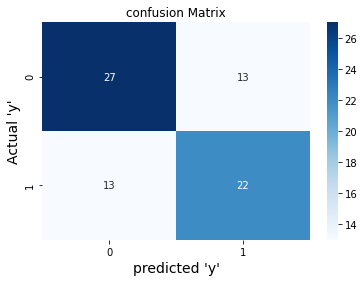

[SVC(C=100, class_weight='balanced', gamma=0.001, probability=True,
    random_state=0), 0.7411764705882353, 0.7383559577677224, 0.6875, 0.7079721887743874, 0.736732456140351]
[0.6533333333333333, 0.6533333333333333, 0.6533333333333333, 0.6533333333333333, 0.6517857142857144]
gnb


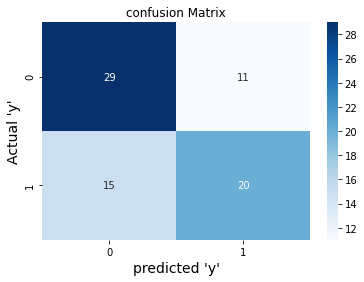

[GaussianNB(var_smoothing=1.0), 0.7636974789915967, 0.7821245421245421, 0.675, 0.7240637745643308, 0.7570906432748538]
[0.6533333333333333, 0.6525904203323557, 0.6533333333333333, 0.651082251082251, 0.6482142857142856]
lr


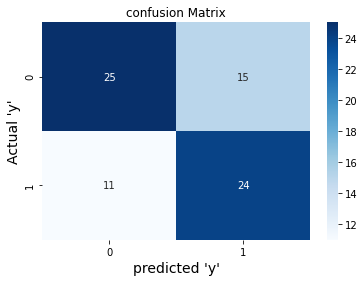

[LogisticRegression(C=1, class_weight='balanced', max_iter=500, random_state=0,
                   solver='liblinear'), 0.7468907563025211, 0.7267686561804209, 0.725, 0.7226012662118139, 0.7449561403508772]
[0.6533333333333333, 0.6575498575498576, 0.6533333333333333, 0.6535798956851588, 0.6553571428571429]
dt


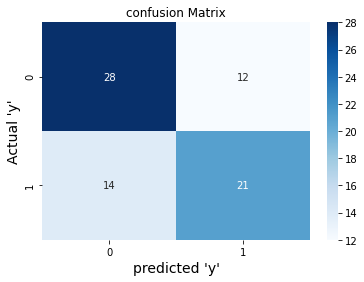

[DecisionTreeClassifier(class_weight='balanced', max_depth=1,
                       min_samples_split=5, random_state=0), 0.7870588235294118, 0.7899793601651186, 0.7375, 0.7566568914956012, 0.7827850877192983]
[0.6533333333333333, 0.6525252525252525, 0.6533333333333333, 0.6524629363940697, 0.6499999999999999]
rf


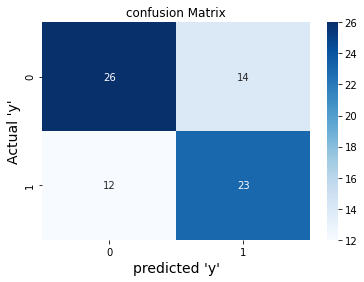

[RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=3, min_samples_split=5, n_estimators=200,
                       random_state=0), 0.7642016806722689, 0.7707843137254903, 0.7, 0.7292975841362939, 0.7590643274853802]
[0.6533333333333333, 0.6550023707918444, 0.6533333333333333, 0.6537037037037038, 0.6535714285714286]
svc 

gnb 991298

lr 999409

rf 999

dt 999

+---------------------+----------------+----------------+----------------+----------------+----------------+
|        Model        |    Accuracy    |   Precision    |     Recall     |    F1 Score    |      Auc       |
+---------------------+----------------+----------------+----------------+----------------+----------------+
|     Naive Bayes     | (56.56, 75.0)  | (59.5, 76.03)  | (56.56, 75.0)  | (51.07, 74.95) | (55.76, 74.54) |
|     Decison Tree    | (54.1, 77.12)  | (57.88, 77.24) | (54.1, 77.12)  | (50.81, 77.07) | (54.57, 77.01) |
|    Random Forest    | (63.2, 76.16)  

In [33]:
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, cross_validate, StratifiedKFold
from sklearn.metrics import roc_curve, auc
import numpy as np
np.random.seed(0)
import warnings
warnings.simplefilter('ignore')
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,make_scorer,precision_score,recall_score
print(__doc__)
cv_dict={}
test_dict={}

# Choose cross-validation techniques for the inner and outer loops,
# independently of the dataset.

# E.g "GroupKFold", "LeaveOneOut", "LeaveOneGroupOut", etc.

scoring={'Accuracy':make_scorer(accuracy_score),'Precision':make_scorer(precision_score),'Recall':make_scorer(recall_score),'F1 Score':make_scorer(f1_score),'AUC':make_scorer(roc_auc_score)}

inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

mts=['svc','gnb','lr','dt','rf']
# Set up possible values of parameters to optimize over
p_grids=[[] for i in range(5)]
p_grids[0] = {"C": [1, 10, 100, 1000, 10000],"gamma": [.0001, .001, .01, .1, .2, .5]}
p_grids[1]={'var_smoothing': np.logspace(0,-9, num=100)}
p_grids[2]={"C": [1, 10, 100, 1000, 10000],"fit_intercept":[True,False],"penalty":['l1', 'l2']}
p_grids[3]={'criterion':['gini','entropy'],'max_depth':  [1, 5, 10, 50], "min_samples_split": [5, 10, 100, 500]}
p_grids[4] = { 'n_estimators': [100,200],'max_features': ['auto', 'sqrt', 'log2'],'max_depth': [3, 5, 10],'min_samples_split': [2, 5, 10],'criterion' :['gini', 'entropy']}
#p_grids[5]= {'max_depth':  [4,5,6,7,8], "n_estimators": [10, 20,50,70,100,150] }
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']
#p_grids[6] = dict(n_neighbors=k_range, weights=weight_options)
#p_grid = {"loss":["deviance"],"learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],"min_samples_split": np.linspace(0.1, 0.5, 12),"min_samples_leaf": np.linspace(0.1, 0.5, 12),"max_depth":[3,5,8],"max_features":["log2","sqrt"],"criterion": ["friedman_mse",  "mae"],"subsample":[0.5, 0.8, 0.85, 0.9, 0.95, 1.0],"n_estimators":[10]}

# ML model
models=[[] for i in range(5)]
models[0] = SVC(kernel="rbf",random_state=0,class_weight='balanced',probability=True)
models[1]=GaussianNB()
models[2]=LogisticRegression(random_state=0,solver='liblinear',max_iter=500,class_weight='balanced')
models[3]=DecisionTreeClassifier(random_state=0,class_weight='balanced')
models[4]=RandomForestClassifier(random_state=0,class_weight='balanced')
#models[5]=XGBClassifier(random_state=0,class_weight='balanced',probability=True)
#models[6]=KNeighborsClassifier()
#model=GradientBoostingClassifier(random_state=0)

#data=pd.read_csv('../dataset/covid_survey_data_sg.csv')
data=df[generic0+label]
values=data.values
X=data.iloc[:, 0 : -1]
Y=list(values[:,-1])
Y=[0 if val=='Non-COVID' else 1 for val in Y]
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify= Y,  random_state = 0,test_size = 0.3)
#X_train,X_test=standarize(X_train,X_test)
#st_scale=StandardScaler().fit(X_train)
#X_train=pd.DataFrame(st_scale.transform(X_train), index=X_train.index, columns=X_train.columns)
#X_test=pd.DataFrame(st_scale.transform(X_test), index=X_test.index, columns=X_test.columns)

for i in range(5):
    mt=mts[i]
    print(mt)
    p_grid=p_grids[i]
    model=models[i]
    clf = GridSearchCV(estimator=model, param_grid=p_grid, cv=inner_cv,scoring=scoring,refit='AUC')
    clf.fit(X_train, Y_train)

    # Nested CV with parameter optimization
    nested_cvscore = cross_validate(clf, X=X_train, y=Y_train, cv=outer_cv,scoring=scoring)
    cv_dict[mt]=[clf.best_estimator_,nested_cvscore['test_Accuracy'].mean(),nested_cvscore['test_Precision'].mean(),nested_cvscore['test_Recall'].mean(),nested_cvscore['test_F1 Score'].mean(),nested_cvscore['test_AUC'].mean()]


    model=cv_dict[mt][0]
    model.fit(X_train,Y_train)
    Y_pred=model.predict(X_test)
    from sklearn.metrics import confusion_matrix
    cm=confusion_matrix(Y_test,Y_pred)

    import seaborn as sns
    import matplotlib.pyplot as plt     

    sns.heatmap(cm, annot=True,fmt="d",cmap='Blues')
    plt.title('confusion Matrix')
    plt.ylabel("Actual 'y'", fontdict= {'fontsize' : 14})
    plt.xlabel("predicted 'y'", fontdict= {'fontsize' : 14})
    plt.show()

    test_dict[mt]=evaluation_metrics(Y_test,Y_pred)
    #evaluation_metrics(Y_test,Y_pred)
    print(cv_dict[mt])
    print(test_dict[mt])

#     import pickle
#     with open('../dataset/cv_dict_sel_pstd_t','wb') as f:
#         pickle.dump(cv_dict,f)
#     with open('../dataset/test_dict_sel_pstd_t','wb') as f:
#         pickle.dump(test_dict,f)
        
import numpy
from pandas import read_csv
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
# load dataset
#data = read_csv('../dataset/covid_survey_data40.csv')
#values = data.values[:,1:]
values=data.values
# configure bootstrap
n_iterations = 1000
n_size = int(len(data) * 0.50)
clfs=['svc','gnb','lr','rf','dt']
stats_dict = {}
# with open('../dataset/cv_dict_sel_pstd_t','rb') as f:
#     cv_dict=pickle.load(f)
for i in range(5):
    clf=clfs[i]
    print(clf,'\n')
    # run bootstrap
    acc_stats = []
    pre_stats = []
    rec_stats = []
    f1_stats = []
    auc_stats = []
    for i in range(n_iterations):
        print('i=',i,end='\r')
        # prepare train and test sets
        train = resample(values, stratify=values[:,-1],n_samples=n_size)
        test = numpy.array([x for x in values if x.tolist() not in train.tolist()])
        train[:,-1]=np.array([0 if val=='Non-COVID' else 1 for val in list(train[:,-1])])
        test[:,-1]=np.array([0 if val=='Non-COVID' else 1 for val in list(test[:,-1])])
        X_train=pd.DataFrame(train[:,:-1])
        #X_train.columns=colnames[:-1]
        X_test=pd.DataFrame(test[:,:-1])
        #X_test.columns=colnames[:-1]
        
        #st_scale=StandardScaler().fit(X_train)
        #X_train=pd.DataFrame(st_scale.transform(X_train), index=X_train.index, columns=X_train.columns)
        #X_test=pd.DataFrame(st_scale.transform(X_test), index=X_test.index, columns=X_test.columns)

        Y_train=list(train[:,-1])
        Y_test=list(test[:,-1])
        #X_train,X_test=standarize(X_train,X_test)
        # fit model
        model = cv_dict[clf][0]
        model.fit(X_train, Y_train)
        # evaluate model
        predictions = model.predict(X_test)
        acc_stats.append(accuracy_score(Y_test, predictions))
        pre_stats.append(precision_score(Y_test, predictions,average='weighted'))
        rec_stats.append(recall_score(Y_test, predictions,average='weighted'))
        f1_stats.append(f1_score(Y_test, predictions,average='weighted'))
        #atest=[0 if val=='Non-COVID' else 1 for val in list(Y_test)]
        #apred=[0 if val=='Non-COVID' else 1 for val in list(predictions)]
        auc_stats.append(roc_auc_score(Y_test, predictions,average='weighted'))
        #print('i=',i,' score=',score,' train shape= ',np.shape(train),' test shape= ',np.shape(test),' train ratio=',list(train[:,-1]).count('Non-COVID')/list(train[:,-1]).count('Positive'),' test_ratio=',list(test[:,-1]).count('Non-COVID')/list(test[:,-1]).count('Positive'),end='\r')
    # plot scores
    #pyplot.hist(stats)
    #pyplot.show()
    # confidence intervals
    alpha = 0.95
    p = ((1.0-alpha)/2.0) * 100
    acc_lower = max(0.0, numpy.percentile(acc_stats, p))
    pre_lower = max(0.0, numpy.percentile(pre_stats, p))
    rec_lower = max(0.0, numpy.percentile(rec_stats, p))
    f1_lower = max(0.0, numpy.percentile(f1_stats, p))
    auc_lower = max(0.0, numpy.percentile(auc_stats, p))
    p = (alpha+((1.0-alpha)/2.0)) * 100
    acc_upper = min(1.0, numpy.percentile(acc_stats, p))
    pre_upper = min(1.0, numpy.percentile(pre_stats, p))
    rec_upper = min(1.0, numpy.percentile(rec_stats, p))
    f1_upper = min(1.0, numpy.percentile(f1_stats, p))
    auc_upper = min(1.0, numpy.percentile(auc_stats, p))
    stats_dict[clf]=[(round(acc_lower*100,2),round(acc_upper*100,2)),(round(pre_lower*100,2),round(pre_upper*100,2)),(round(rec_lower*100,2),round(rec_upper*100,2)),(round(f1_lower*100,2),round(f1_upper*100,2)),(round(auc_lower*100,2),round(auc_upper*100,2))]
    #print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))
# with open('../dataset/stats_sel_pstd_dict_t','wb') as f:
#     pickle.dump(stats_dict,f)
    


from prettytable import PrettyTable
#generic
x = PrettyTable()
x.field_names = [ "Model", 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Auc']
x.add_row(['Naive Bayes']+stats_dict['gnb'])
x.add_row(['Decison Tree']+stats_dict['dt'])
x.add_row(['Random Forest']+stats_dict['rf'])
x.add_row(['Logistic Regression']+stats_dict['lr'])
x.add_row(['SVM']+stats_dict['svc'])
print(x)

In [ ]:
df <- data.frame(id=LETTERS[1:4], min=c(13,15,23,2), max=c(20,30,40,11))
library(ggplot2)
ggplot(df, aes(x=id))+
geom_linerange(aes(ymin=min,ymax=max),linetype=2,color="blue")+
geom_point(aes(y=min),size=3,color="red")+
geom_point(aes(y=max),size=3,color="red")+
theme_bw()